In [228]:

# pip install imbalanced-learn
# pip install seaborn
# pip install pydot
# pip install scikit-learn
# pip install joblib

In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pprint import pprint
from sklearn.tree import export_graphviz
import pydot
from matplotlib import pyplot as plt
import joblib
import seaborn as sns

In [288]:
def creating_features_labels(file):#reading in data and splitting variables from labels
    features = pd.read_csv(file).iloc[:,2:]

    #identify the labels, i.e. the value to predict and remove it from the total cases
    # features = features [features["TOTAL_CASES" ] != 0] 
    labels = np.array(features["RISK"])
    # print("features")
    # pprint(features.describe())
    features = features.drop(['TOTAL_CASES', 'SUITABILITY_MEDIAN', 'CASES_DENSITY', 'RISK'], axis = 1)


    # Saving feature names for later use
    feature_list = list(features.columns)
    # print(feature_list)
    # print("labels")
    # print(labels)

    #convert to numpy array
    features = np.array(features)

    return labels, features, feature_list

In [231]:
def savetext_files():#write the data to a file for future analysis
    np.savetxt('/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/train_features_no_zeros_classifier.csv',train_features, delimiter=",", header = 'TRAIN_FEATURES')
    np.savetxt('/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/test_features_no_zeros_classifier.csv',test_features, delimiter=",", header = 'TEST_FEATURES')
    np.savetxt('/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/train_labels_no_zeros_classifier.csv', train_labels,delimiter=",", header = 'TRAIN_LABELS')
    np.savetxt('/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/test_labels_no_zeros_classifier.csv', test_labels,delimiter=",", header = 'TEST_LABELS')

In [232]:
def random_test(max_samples, max_features, ccp_alpha, class_weight, bootstrap, train_features, train_labels):#set the range of hyperparameter options to consider


    #create the random grid 
    random_grid = {'max_samples': max_samples,
                'max_features': max_features,
                'ccp_alpha': ccp_alpha,
                'bootstrap': bootstrap, 
                # 'class_weight' : class_weight
                 "sampling_strategy": class_weight}

    # pprint(random_grid)

    # Use the random grid to search for best hyperparameters
    rf = BalancedRandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)
    rf_random.fit(train_features, train_labels)
    print(rf_random.best_params_)
    return rf_random

In [233]:
def setup_and_random():
    
    rf_input = '/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/rf_current_input_chagas_density_categories_no_zeros.csv'
    
    labels, features, feature_list = creating_features_labels(rf_input)

    #split the data into training and testing
    
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.4, random_state = 42) #remove 42 in final run but just used when testing code
    # #save training and testing features and labels for later analysis
    # savetext_files()

    #which hyperparameters can i tune?
    rf = BalancedRandomForestClassifier(random_state = 42)
    print('Parameters currently in use:\n')
    pprint(rf.get_params())

    #do a random search to find inital better parameters
    bootstrap = [True]
    # class_weight = ["balanced_subsample" , "balanced"]
    sampling_strategy = ['majority', 'not minority', 'all']
    ccp_alpha = [i for i in np.linspace(start = 0, stop = 0.05, num = 50)] 
    # ccp_alpha = [0]
    max_features = [1,2,3]
    max_samples = [i for i in np.linspace(start = 0, stop = 1, num = 50)]
    random_classifier = random_test(max_samples, max_features, ccp_alpha, sampling_strategy, bootstrap, train_features, train_labels)
    return random_classifier,train_features, test_features, train_labels, test_labels, features, labels
    

In [234]:
#split data and get inital rf algorithm (broken up like this as the random search takes a while)
random_classifier,train_features, test_features, train_labels, test_labels, features, labels = setup_and_random()


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}


/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/imblearn/ensemble/_forest.py", line 497, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/laurengomezcullen/opt/ana

{'sampling_strategy': 'all', 'max_samples': 0.6530612244897959, 'max_features': 2, 'ccp_alpha': 0.036734693877551024, 'bootstrap': True}


In [304]:
#assess the efficacy of the hyperparameter search
def evaluate(model, test_features, test_labels,name):
    predictions = model.predict(test_features)
    np.savetxt("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/random_forest/outputs/" + name +"_current_predictions_no_zeros_classifier.csv", predictions, delimiter=",",fmt="%s",  header = 'RISK')
    accuracy = accuracy_score(test_labels, predictions)
    confusion = confusion_matrix(test_labels, predictions)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    confusion[[1,2]] = confusion[[2,1]]
    confusion = confusion[:, [0, 2, 1]]
    sns.heatmap(confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis], annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)
    class_names = ['HIGH', 'MEDIUM', 'LOW']
    tick_marks = np.arange(len(class_names)) +0.5
    if len(test_features) == 1122:
        plt.xticks(tick_marks, class_names, rotation=0) 
        tick_marks = np.arange(len(class_names)+1) +0.5        
        plt.yticks(tick_marks, class_names + ['NONE'] , rotation=0)
    else: 
        tick_marks = np.arange(len(class_names)) +0.5
        plt.xticks(tick_marks, class_names, rotation=0)
        plt.yticks(tick_marks, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()


    # print(confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis])
    report = classification_report(test_labels, predictions)
    
    return accuracy, confusion, report

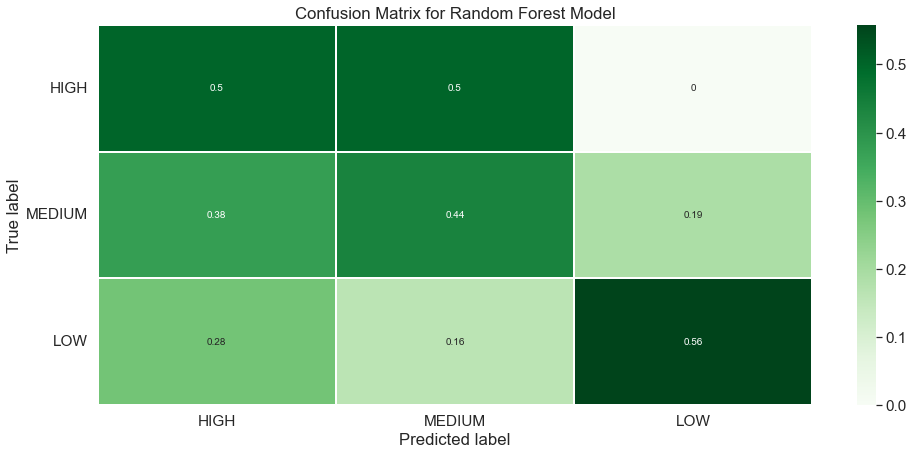

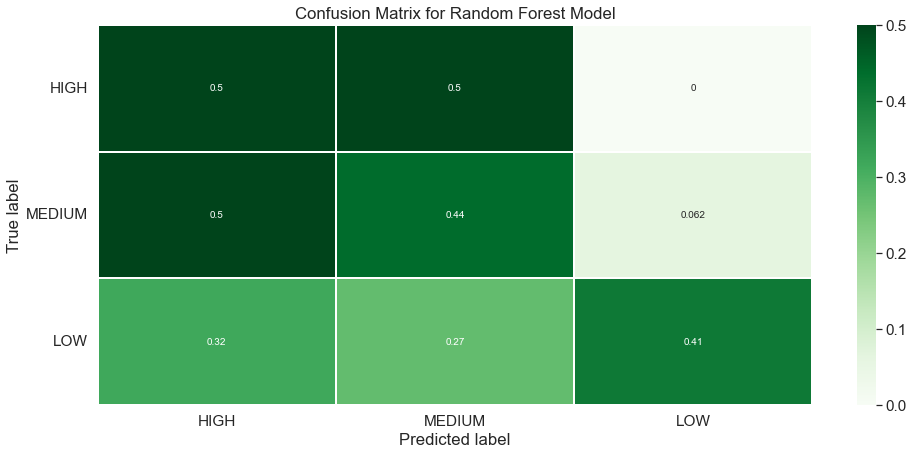

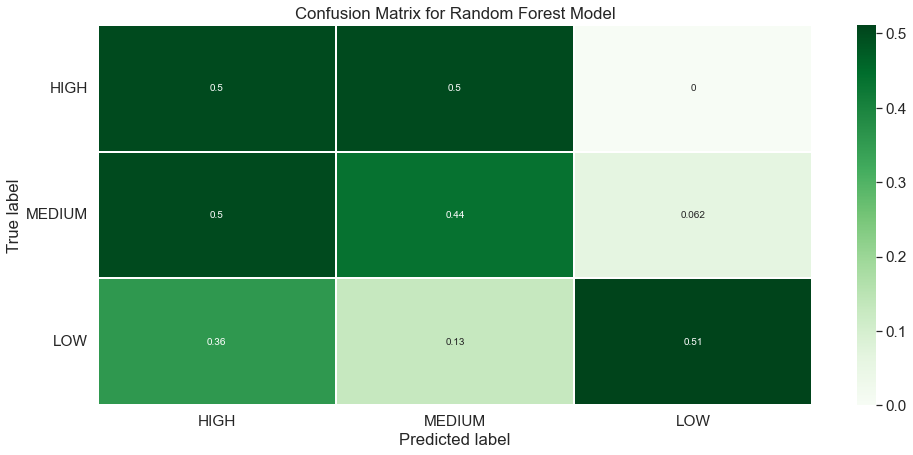

base accuracy = 54.36%.
base and boot accuracy = 41.61%.
random accuracy = 50.34%.
base_report
              precision    recall  f1-score   support

        HIGH       0.05      0.50      0.08         4
         LOW       0.96      0.56      0.71       129
      MEDIUM       0.23      0.44      0.30        16

    accuracy                           0.54       149
   macro avg       0.41      0.50      0.36       149
weighted avg       0.86      0.54      0.65       149

base_boot_report
              precision    recall  f1-score   support

        HIGH       0.04      0.50      0.07         4
         LOW       0.98      0.41      0.58       129
      MEDIUM       0.16      0.44      0.23        16

    accuracy                           0.42       149
   macro avg       0.39      0.45      0.30       149
weighted avg       0.87      0.42      0.53       149

random_report
              precision    recall  f1-score   support

        HIGH       0.04      0.50      0.07         4
   

In [306]:

base_model = BalancedRandomForestClassifier(bootstrap = False, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy, base_confusion, base_report = evaluate(base_model, test_features, test_labels, "base")
joblib.dump(base_model, "/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/random_forest/outputs/base_model_no_zeros_classifier.joblib")

base_model_boot = BalancedRandomForestClassifier(bootstrap = True, random_state = 42)
base_model_boot.fit(train_features, train_labels)
base_accuracy_boot, base_boot_confusion, base_boot_report = evaluate(base_model_boot, test_features, test_labels, "base_boot")
# print('base with boot oob prediction: ' + str(base_model_boot.oob_prediction_))
# print('base with boot oob: ' + str(base_model_boot.oob_score_))
joblib.dump(base_model_boot, "/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/random_forest/outputs/base_model_boot_no_zeros_classifier.joblib")

best_random = random_classifier.best_estimator_
random_accuracy, random_confusion, random_report = evaluate(best_random, test_features, test_labels, "random_base")
joblib.dump(best_random, "/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/random_forest/outputs/best_random_no_zeros_classifier.joblib")
print('base accuracy = {:0.2f}%.'.format(base_accuracy*100))
print('base and boot accuracy = {:0.2f}%.'.format(base_accuracy_boot*100))
print('random accuracy = {:0.2f}%.'.format(random_accuracy*100))
print("base_report")
print(base_report)
print("base_boot_report")
print(base_boot_report)
print("random_report")
print(random_report)

In [ ]:
#from above can see that the base model is best so using that

RandomForestRegressor(ccp_alpha=0, max_features=1,
                      max_samples=0.12857142857142856)


/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/Users/laurengomezcullen/opt/anac

1122


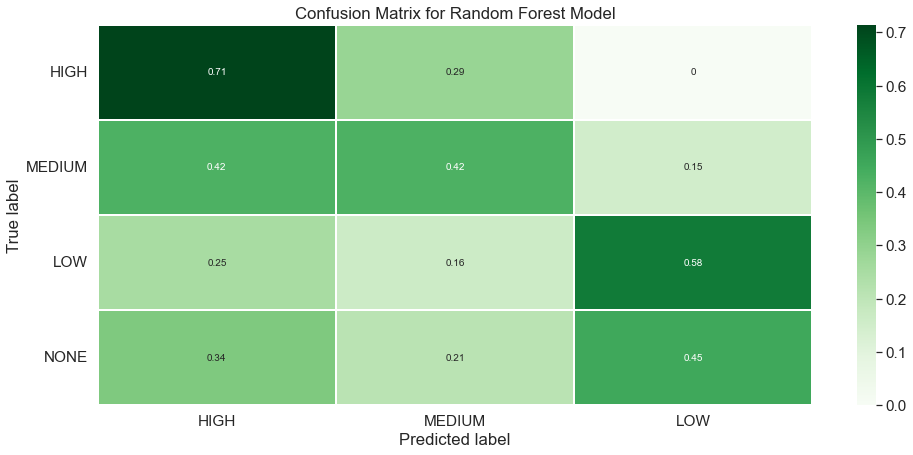

base_country_accuracy = 18.72%.
              precision    recall  f1-score   support

        HIGH       0.01      0.71      0.03         7
         LOW       0.35      0.58      0.44       323
      MEDIUM       0.07      0.42      0.13        40
        NONE       0.00      0.00      0.00       752

    accuracy                           0.19      1122
   macro avg       0.11      0.43      0.15      1122
weighted avg       0.10      0.19      0.13      1122



/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurengomezcullen/opt/anaconda3/envs/python_Env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [305]:
# create prediction for entire country using model
file = '/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/rf_current_input_chagas_density_categories.csv'
labels, features, feature_list  = creating_features_labels(file)
print(len(labels))
base_country_accuracy, base_country_confusion, base_country_report = evaluate(base_model, features, labels, "final_entire_country")
print('base_country_accuracy = {:0.2f}%.'.format(base_country_accuracy*100))
print(base_country_report)